# 1. Defining the Data Analysis Workflow:

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import datetime as dt

In [6]:
# Load the data
data = pd.read_csv('../data/Copy of BrentOilPrices.csv')  
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.head()

C:\Users\Hermela\AppData\Local\Temp\ipykernel_8612\417859998.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


In [7]:
# Summary of the dataset
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9011 entries, 1987-05-20 to 2022-11-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   9011 non-null   float64
dtypes: float64(1)
memory usage: 140.8 KB
None
             Price
count  9011.000000
mean     48.420782
std      32.860110
min       9.100000
25%      19.050000
50%      38.570000
75%      70.090000
max     143.950000


In [8]:
# Check for missing values
print(data.isnull().sum())

Price    0
dtype: int64


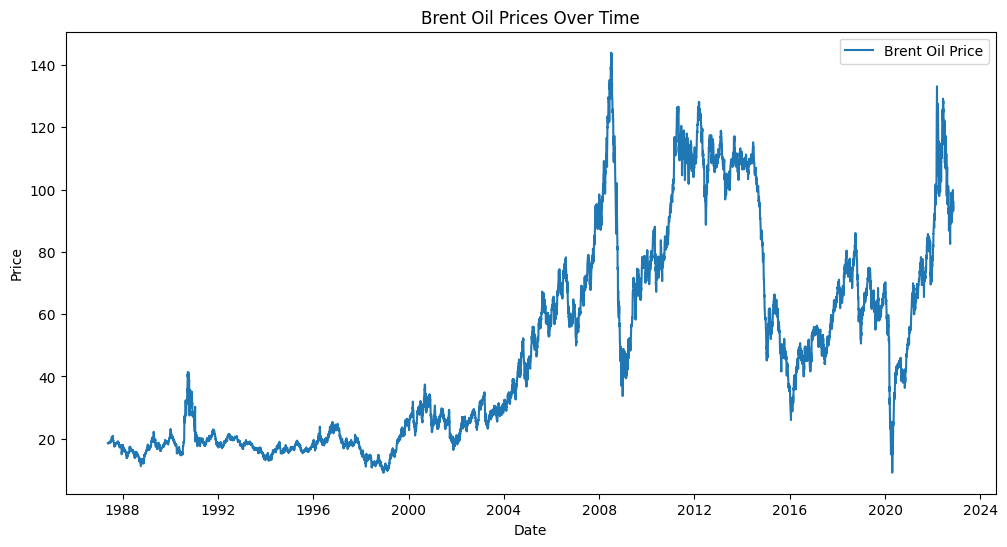

In [9]:
# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(data['Price'], label='Brent Oil Price')
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [10]:
# Handling missing values (e.g., using forward fill)
data['Price'].fillna(method='ffill', inplace=True)

# Confirm there are no more missing values
print(data.isnull().sum())

Price    0
dtype: int64


C:\Users\Hermela\AppData\Local\Temp\ipykernel_8612\793193676.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Price'].fillna(method='ffill', inplace=True)
C:\Users\Hermela\AppData\Local\Temp\ipykernel_8612\793193676.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Price'].fillna(method='ffill', inplace=True)


In [11]:
# Adding month and year as additional features
data['Year'] = data.index.year
data['Month'] = data.index.month

In [12]:
# Creating a rolling average feature
data['Rolling_Mean'] = data['Price'].rolling(window=30).mean()

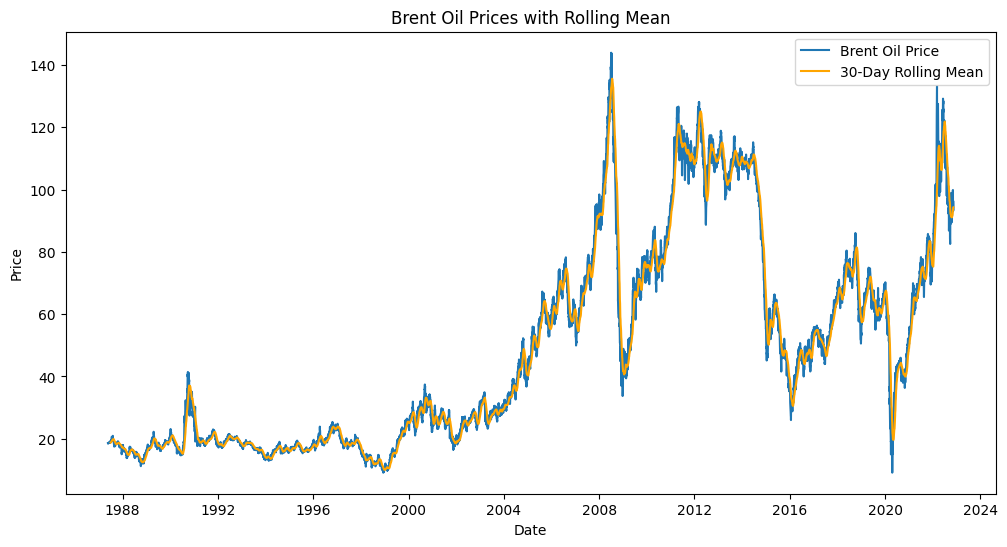

In [13]:
# Visualizing the rolling mean
plt.figure(figsize=(12, 6))
plt.plot(data['Price'], label='Brent Oil Price')
plt.plot(data['Rolling_Mean'], label='30-Day Rolling Mean', color='orange')
plt.title('Brent Oil Prices with Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

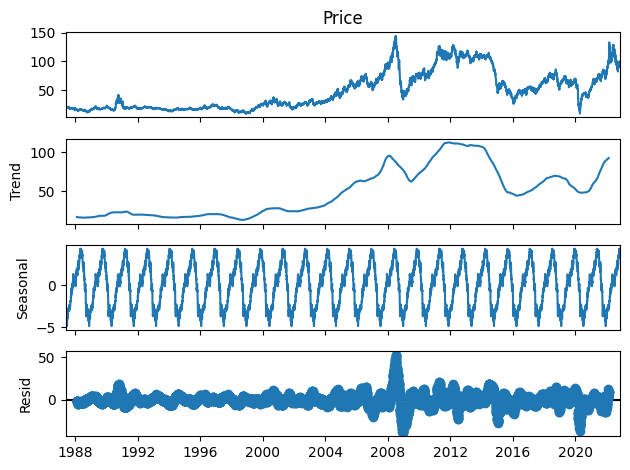

In [14]:
# Decompose the time series to observe trend, seasonality, and residuals
decomposition = seasonal_decompose(data['Price'], model='additive', period=365)
decomposition.plot()
plt.show()

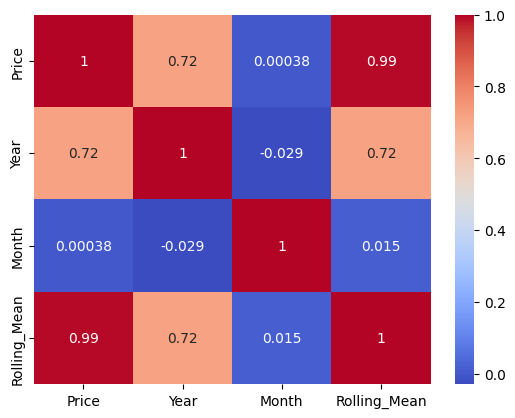

In [15]:
# Correlation heatmap (if other economic indicators are added)
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [16]:
# Split the data into training and testing sets (80-20 split)
train_size = int(len(data) * 0.8)
train, test = data['Price'][:train_size], data['Price'][train_size:]

In [17]:
# Split the data into training and testing sets (80-20 split)
train_size = int(len(data) * 0.8)
train, test = data['Price'][:train_size], data['Price'][train_size:]

In [18]:
# ARIMA model
model = ARIMA(train, order=(5, 1, 2))  # Update with optimized parameters
arima_model = model.fit()

c:\Users\Hermela\Documents\10-Academy\Change-point-analysis-and-statistical-modelling--WEEK10\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hermela\Documents\10-Academy\Change-point-analysis-and-statistical-modelling--WEEK10\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hermela\Documents\10-Academy\Change-point-analysis-and-statistical-modelling--WEEK10\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hermela

In [19]:
# Forecasting
forecast = arima_model.forecast(steps=len(test))
test.index = forecast.index

c:\Users\Hermela\Documents\10-Academy\Change-point-analysis-and-statistical-modelling--WEEK10\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Hermela\Documents\10-Academy\Change-point-analysis-and-statistical-modelling--WEEK10\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


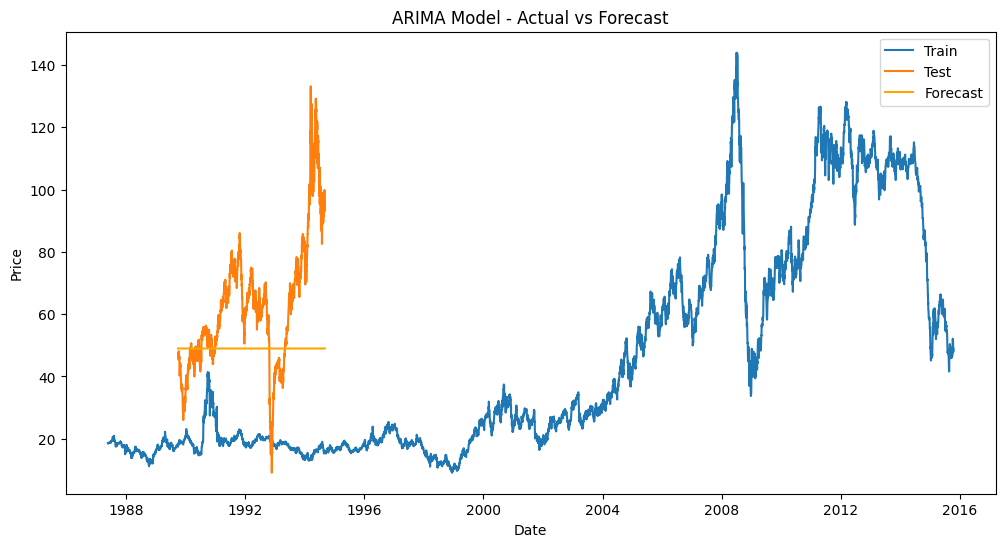

In [20]:
# Plotting actual vs. forecasted prices
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Forecast', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ARIMA Model - Actual vs Forecast')
plt.legend()
plt.show()

In [21]:
# Evaluation metrics
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 18.48969768175152
Mean Squared Error (MSE): 617.0499908174747
Root Mean Squared Error (RMSE): 24.84049095363203


c:\Users\Hermela\Documents\10-Academy\Change-point-analysis-and-statistical-modelling--WEEK10\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Hermela\Documents\10-Academy\Change-point-analysis-and-statistical-modelling--WEEK10\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


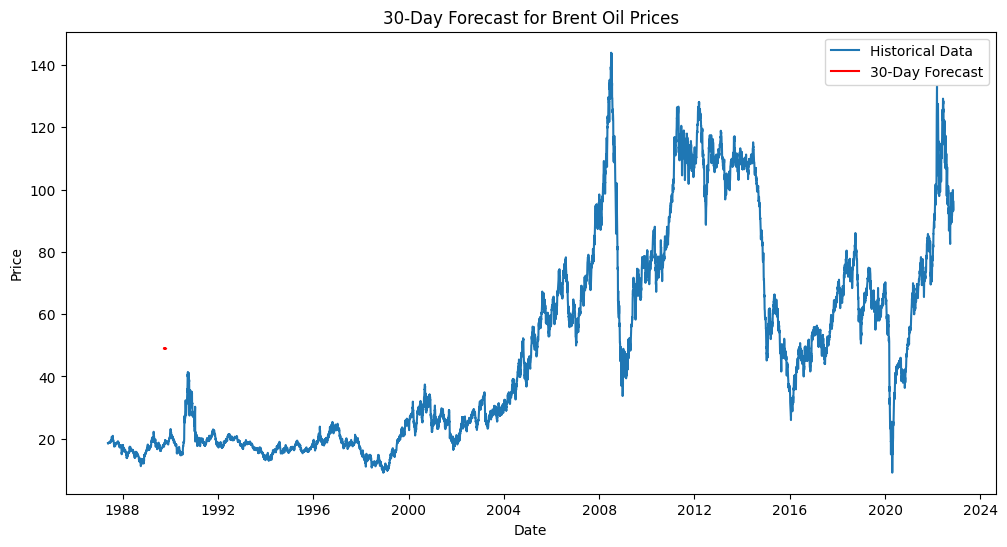

In [22]:
# Making future forecasts
future_forecast = arima_model.forecast(steps=30)  # Predicting the next 30 days

# Plotting future forecasts
plt.figure(figsize=(12, 6))
plt.plot(data['Price'], label='Historical Data')
plt.plot(future_forecast, label='30-Day Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('30-Day Forecast for Brent Oil Prices')
plt.legend()
plt.show()


In [24]:
# Save the forecast and metrics as a CSV or Excel file
forecast.to_csv('../data/brent_oil_price_forecast.csv')